In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd

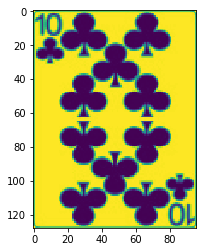

In [42]:
data_loc = '../dataset/'
decklist = os.listdir(data_loc)
cardlist=[]
for i in os.listdir(data_loc+'card_deck1'):
    cardlist.append(i[:-4])
imglist = []
for j in cardlist:
    for i in decklist:
        tmpimg = cv2.imread(data_loc+i+'/'+j+'.jpg', cv2.IMREAD_GRAYSCALE)
        tmpimg = cv2.resize(tmpimg, (96, 128), interpolation=cv2.INTER_AREA)
        imglist.append(tmpimg)
labellist=[]
for i in cardlist:
    for j in range(5):
        labellist.append(i)
plt.imshow(imglist[0])

In [55]:
32*4

128

In [56]:
# hog = cv2.HOGDescriptor((100, 100), (10, 10), (5, 5), (5, 5), 9)
hog = cv2.HOGDescriptor((32,48), (16,16), (8,8), (8,8), 9)
computed = []
for img in imglist:
    computed.append(hog.compute(img))

In [57]:
train_desc = np.array(computed).squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(52), len(train_desc)/52)

In [139]:
# svm 파라미터는 진짜 모르겠따... C가 뭔지 감마가 뭔지...ㅠㅠ
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(0.5)
svm.setGamma(0.07)
svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)

True

39 S10


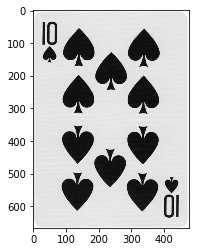

In [140]:
test_img = cv2.imread('spade10.jpg')
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
img_resize = cv2.resize(test_img, (96, 128), interpolation=cv2.INTER_AREA)

desc = hog.compute(img_resize)
test_desc = np.array(desc).astype(np.float32)

_, res = svm.predict(test_desc.T)
print(int(res), cardlist[int(res)])
plt.imshow(test_img, cmap=('gray'))
plt.show()

31 H6


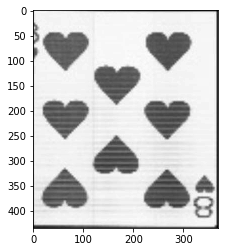

In [141]:
test_img = cv2.imread("It's CLEAN CODE/heart8.jpg")
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
img_resize = cv2.resize(test_img, (96, 128), interpolation=cv2.INTER_AREA)

desc = hog.compute(img_resize)
test_desc = np.array(desc).astype(np.float32)

_, res = svm.predict(test_desc.T)
print(int(res), cardlist[int(res)])
plt.imshow(test_img, cmap=('gray'))
plt.show()

In [123]:
cards = cv2.imread('cards_new.jpg', cv2.IMREAD_GRAYSCALE)

In [67]:
cards = cv2.resize(cards, (96, int(1106/99 * 96)), interpolation=cv2.INTER_AREA)

In [124]:
cards = cv2.resize(cards, (96, 1256), interpolation=cv2.INTER_AREA)

In [125]:
cards.shape

(1256, 96)

In [126]:
test_img = None
mylist = []
for i in range(cards.shape[0]-128):
    test_img = cards[i:i+128,:]
    desc = hog.compute(test_img)
    test_desc = np.array(desc).astype(np.float32)
    _, res = svm.predict(test_desc.T)
    mylist.append([int(res), cardlist[int(res)]])
#     print(int(res), cardlist[int(res)])
    if i % 50==0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100


In [127]:
df = pd.DataFrame(mylist)

In [129]:
df[1].value_counts()

SQ    1092
CK      25
HQ      11
Name: 1, dtype: int64

In [ ]:
df[1]

In [115]:
for i in range(25):
    for j in range(96):
        cards[i*50][j]=0

In [ ]:
plt.figure(figsize= (30,30))
plt.imshow(cards, cmap = 'gray')

In [144]:
# svm 파라미터는 진짜 모르겠따... C가 뭔지 감마가 뭔지...ㅠㅠ
Clist = [0.5, 0.7, 1, 1.2, 1.5]
Glist = [0.12, 0.11, 0.1, 0.09, 0.08, 0.07]
for c in Clist:
    for g in Glist:
        svm = cv2.ml.SVM_create()
        svm.setType(cv2.ml.SVM_C_SVC)
        svm.setKernel(cv2.ml.SVM_RBF)
        svm.setC(c)
        svm.setGamma(g)
        svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
        desc = hog.compute(img_resize)
        test_desc = np.array(desc).astype(np.float32)

        _, res = svm.predict(test_desc.T)
        print('C : %2f\tGamma : %2f\t%s'%(c,g,cardlist[int(res)]))
#         print(c, g, int(res), cardlist[int(res)])

0.5 0.12 33 H8
0.5 0.11 33 H8
0.5 0.1 33 H8
0.5 0.09 33 H8
0.5 0.08 33 H8
0.5 0.07 31 H6
0.7 0.12 33 H8
0.7 0.11 33 H8
0.7 0.1 33 H8
0.7 0.09 33 H8
0.7 0.08 33 H8
0.7 0.07 31 H6
1 0.12 30 H5
1 0.11 30 H5
1 0.1 30 H5
1 0.09 30 H5
1 0.08 30 H5
1 0.07 30 H5
1.2 0.12 30 H5
1.2 0.11 30 H5
1.2 0.1 30 H5
1.2 0.09 30 H5
1.2 0.08 30 H5
1.2 0.07 30 H5
1.5 0.12 30 H5
1.5 0.11 30 H5
1.5 0.1 30 H5
1.5 0.09 30 H5
1.5 0.08 30 H5
1.5 0.07 30 H5


In [145]:
# svm 파라미터는 진짜 모르겠따... C가 뭔지 감마가 뭔지...ㅠㅠ
test_img = cv2.imread("CK.jpg")
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
img_resize = cv2.resize(test_img, (96, 128), interpolation=cv2.INTER_AREA)


Clist = [0.5, 0.7, 1, 1.2, 1.5]
Glist = [0.12, 0.11, 0.1, 0.09, 0.08, 0.07]
for c in Clist:
    for g in Glist:
        svm = cv2.ml.SVM_create()
        svm.setType(cv2.ml.SVM_C_SVC)
        svm.setKernel(cv2.ml.SVM_RBF)
        svm.setC(c)
        svm.setGamma(g)
        svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
        desc = hog.compute(img_resize)
        test_desc = np.array(desc).astype(np.float32)

        _, res = svm.predict(test_desc.T)
        print('C : %2f\tGamma : %2f\t%s'%(c,g,cardlist[int(res)]))
#         print(c, g, int(res), cardlist[int(res)])

C : 0.500000	Gamma : 0.120000	SK
C : 0.500000	Gamma : 0.110000	HQ
C : 0.500000	Gamma : 0.100000	C9
C : 0.500000	Gamma : 0.090000	C9
C : 0.500000	Gamma : 0.080000	C5
C : 0.500000	Gamma : 0.070000	D9
C : 0.700000	Gamma : 0.120000	HQ
C : 0.700000	Gamma : 0.110000	HQ
C : 0.700000	Gamma : 0.100000	C9
C : 0.700000	Gamma : 0.090000	C9
C : 0.700000	Gamma : 0.080000	C5
C : 0.700000	Gamma : 0.070000	D9
C : 1.000000	Gamma : 0.120000	H5
C : 1.000000	Gamma : 0.110000	H5
C : 1.000000	Gamma : 0.100000	H5
C : 1.000000	Gamma : 0.090000	H5
C : 1.000000	Gamma : 0.080000	H5
C : 1.000000	Gamma : 0.070000	H5
C : 1.200000	Gamma : 0.120000	H5
C : 1.200000	Gamma : 0.110000	H5
C : 1.200000	Gamma : 0.100000	H5
C : 1.200000	Gamma : 0.090000	H5
C : 1.200000	Gamma : 0.080000	H5
C : 1.200000	Gamma : 0.070000	H5
C : 1.500000	Gamma : 0.120000	H5
C : 1.500000	Gamma : 0.110000	H5
C : 1.500000	Gamma : 0.100000	H5
C : 1.500000	Gamma : 0.090000	H5
C : 1.500000	Gamma : 0.080000	H5
C : 1.500000	Gamma : 0.070000	H5


In [146]:
# svm 파라미터는 진짜 모르겠따... C가 뭔지 감마가 뭔지...ㅠㅠ
test_img = cv2.imread("CK.jpg")
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
img_resize = cv2.resize(test_img, (96, 128), interpolation=cv2.INTER_AREA)


Clist = [0.1, 0.2, 0.3, 0.4]
Glist = [0.12, 0.11, 0.1, 0.09, 0.08, 0.07]
for c in Clist:
    for g in Glist:
        svm = cv2.ml.SVM_create()
        svm.setType(cv2.ml.SVM_C_SVC)
        svm.setKernel(cv2.ml.SVM_RBF)
        svm.setC(c)
        svm.setGamma(g)
        svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
        desc = hog.compute(img_resize)
        test_desc = np.array(desc).astype(np.float32)

        _, res = svm.predict(test_desc.T)
        print('C : %2f\tGamma : %2f\t%s'%(c,g,cardlist[int(res)]))
#         print(c, g, int(res), cardlist[int(res)])

C : 0.100000	Gamma : 0.120000	SK
C : 0.100000	Gamma : 0.110000	HQ
C : 0.100000	Gamma : 0.100000	HQ
C : 0.100000	Gamma : 0.090000	C9
C : 0.100000	Gamma : 0.080000	C6
C : 0.100000	Gamma : 0.070000	C7
C : 0.200000	Gamma : 0.120000	SK
C : 0.200000	Gamma : 0.110000	HQ
C : 0.200000	Gamma : 0.100000	HQ
C : 0.200000	Gamma : 0.090000	C9
C : 0.200000	Gamma : 0.080000	C6
C : 0.200000	Gamma : 0.070000	D9
C : 0.300000	Gamma : 0.120000	SK
C : 0.300000	Gamma : 0.110000	HQ
C : 0.300000	Gamma : 0.100000	HQ
C : 0.300000	Gamma : 0.090000	C9
C : 0.300000	Gamma : 0.080000	C6
C : 0.300000	Gamma : 0.070000	D9
C : 0.400000	Gamma : 0.120000	SK
C : 0.400000	Gamma : 0.110000	HQ
C : 0.400000	Gamma : 0.100000	HQ
C : 0.400000	Gamma : 0.090000	C9
C : 0.400000	Gamma : 0.080000	C6
C : 0.400000	Gamma : 0.070000	D9


In [148]:
# svm 파라미터는 진짜 모르겠따... C가 뭔지 감마가 뭔지...ㅠㅠ
test_img = cv2.imread("It's CLEAN CODE/heart8.jpg")
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
img_resize = cv2.resize(test_img, (96, 128), interpolation=cv2.INTER_AREA)


Clist = [0.1, 0.2, 0.3, 0.4]
Glist = [0.12, 0.11, 0.1, 0.09, 0.08, 0.07]
for c in Clist:
    for g in Glist:
        svm = cv2.ml.SVM_create()
        svm.setType(cv2.ml.SVM_C_SVC)
        svm.setKernel(cv2.ml.SVM_RBF)
        svm.setC(c)
        svm.setGamma(g)
        svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
        desc = hog.compute(img_resize)
        test_desc = np.array(desc).astype(np.float32)

        _, res = svm.predict(test_desc.T)
        print('C : %2f\tGamma : %2f\t%s'%(c,g,cardlist[int(res)]))
#         print(c, g, int(res), cardlist[int(res)])

C : 0.100000	Gamma : 0.120000	H8
C : 0.100000	Gamma : 0.110000	H8
C : 0.100000	Gamma : 0.100000	H8
C : 0.100000	Gamma : 0.090000	H8
C : 0.100000	Gamma : 0.080000	H8
C : 0.100000	Gamma : 0.070000	D7
C : 0.200000	Gamma : 0.120000	H8
C : 0.200000	Gamma : 0.110000	H8
C : 0.200000	Gamma : 0.100000	H8
C : 0.200000	Gamma : 0.090000	H8
C : 0.200000	Gamma : 0.080000	H8
C : 0.200000	Gamma : 0.070000	D7
C : 0.300000	Gamma : 0.120000	H8
C : 0.300000	Gamma : 0.110000	H8
C : 0.300000	Gamma : 0.100000	H8
C : 0.300000	Gamma : 0.090000	H8
C : 0.300000	Gamma : 0.080000	H8
C : 0.300000	Gamma : 0.070000	H6
C : 0.400000	Gamma : 0.120000	H8
C : 0.400000	Gamma : 0.110000	H8
C : 0.400000	Gamma : 0.100000	H8
C : 0.400000	Gamma : 0.090000	H8
C : 0.400000	Gamma : 0.080000	H8
C : 0.400000	Gamma : 0.070000	H6


In [149]:
# svm 파라미터는 진짜 모르겠따... C가 뭔지 감마가 뭔지...ㅠㅠ
test_img = cv2.imread("It's CLEAN CODE/heart8.jpg")
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
img_resize = cv2.resize(test_img, (96, 128), interpolation=cv2.INTER_AREA)


Clist = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
Glist = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
for c in Clist:
    for g in Glist:
        svm = cv2.ml.SVM_create()
        svm.setType(cv2.ml.SVM_C_SVC)
        svm.setKernel(cv2.ml.SVM_RBF)
        svm.setC(c)
        svm.setGamma(g)
        svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
        desc = hog.compute(img_resize)
        test_desc = np.array(desc).astype(np.float32)

        _, res = svm.predict(test_desc.T)
        print('C : %2f\tGamma : %2f\t%s'%(c,g,cardlist[int(res)]))
#         print(c, g, int(res), cardlist[int(res)])

C : 1.000000	Gamma : 1.000000	SQ
C : 1.000000	Gamma : 1.500000	SQ
C : 1.000000	Gamma : 2.000000	SQ
C : 1.000000	Gamma : 2.500000	SQ
C : 1.000000	Gamma : 3.000000	SQ
C : 1.000000	Gamma : 3.500000	SQ
C : 1.000000	Gamma : 4.000000	SQ
C : 1.000000	Gamma : 4.500000	SQ
C : 1.000000	Gamma : 5.000000	SQ
C : 1.500000	Gamma : 1.000000	SQ
C : 1.500000	Gamma : 1.500000	SQ
C : 1.500000	Gamma : 2.000000	SQ
C : 1.500000	Gamma : 2.500000	SQ
C : 1.500000	Gamma : 3.000000	SQ
C : 1.500000	Gamma : 3.500000	SQ
C : 1.500000	Gamma : 4.000000	SQ
C : 1.500000	Gamma : 4.500000	SQ
C : 1.500000	Gamma : 5.000000	SQ
C : 2.000000	Gamma : 1.000000	SQ
C : 2.000000	Gamma : 1.500000	SQ
C : 2.000000	Gamma : 2.000000	SQ
C : 2.000000	Gamma : 2.500000	SQ
C : 2.000000	Gamma : 3.000000	SQ
C : 2.000000	Gamma : 3.500000	SQ
C : 2.000000	Gamma : 4.000000	SQ
C : 2.000000	Gamma : 4.500000	SQ
C : 2.000000	Gamma : 5.000000	SQ
C : 2.500000	Gamma : 1.000000	SQ
C : 2.500000	Gamma : 1.500000	SQ
C : 2.500000	Gamma : 2.000000	SQ
C : 2.5000